[Dataset link](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)


In [302]:
pip install featurewiz


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [303]:
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from featurewiz import featurewiz
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [304]:
df = pd.read_csv("heart.csv")

## Data exploring

Attribute Information
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]



In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [306]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [307]:
df["HeartDisease"].value_counts()


1    508
0    410
Name: HeartDisease, dtype: int64

In [308]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [309]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## we can conclude that:

*   There is no missing data
*   data is almost balanced 
*   There are two features that can be converted to binary base (Sex & ExerciseAngina)
*   Some features are categorical data 

*   There is data that have Cholesterol level = 0 , Which is invalid
*   There is data that have Resting blood pressure = 0, which is invalid
lowest possible measure is 70 according to [medicinenet](https://www.medicinenet.com/blood_pressure_chart_reading_by_age/article.htm)



**Data visualization :** 

**Target Imbalance**

In [310]:
colors = ['White', 'red']
labels = ['Normal','Heart Disease']
values = df['HeartDisease'].value_counts()/df['HeartDisease'].shape[0]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Heart Disease",
    title_font_color="white",
    legend_title_font_color="yellow",
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
)
fig.show()

**Sex**

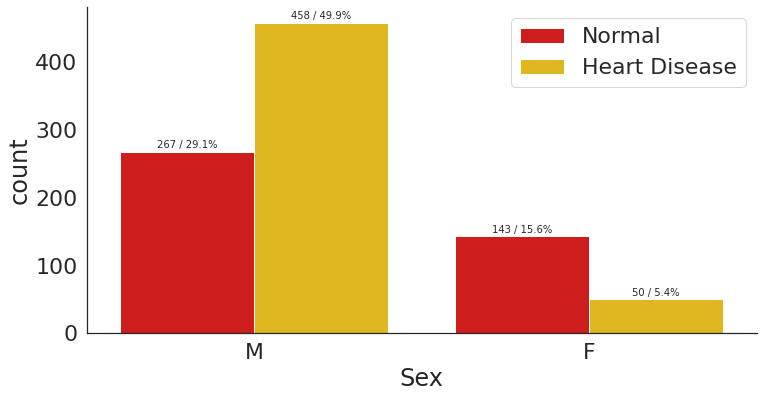

In [311]:
total_cnt = df['HeartDisease'].count()
plt.figure(figsize=(12,6))
sns.set(font_scale = 2)
sns.set_style("white")
ax = sns.countplot(data=df, x='Sex',hue='HeartDisease',palette='hot')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 10, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=10)
plt.legend(labels=labels)
sns.despine()

Observation : males are more likely to have heart disease more than females.



**ChestPainType**


1.   TA: typical angina
2.   ATA: atypical angina
3.   NAP: non-anginal pain
4.   ASY: asymptomatic









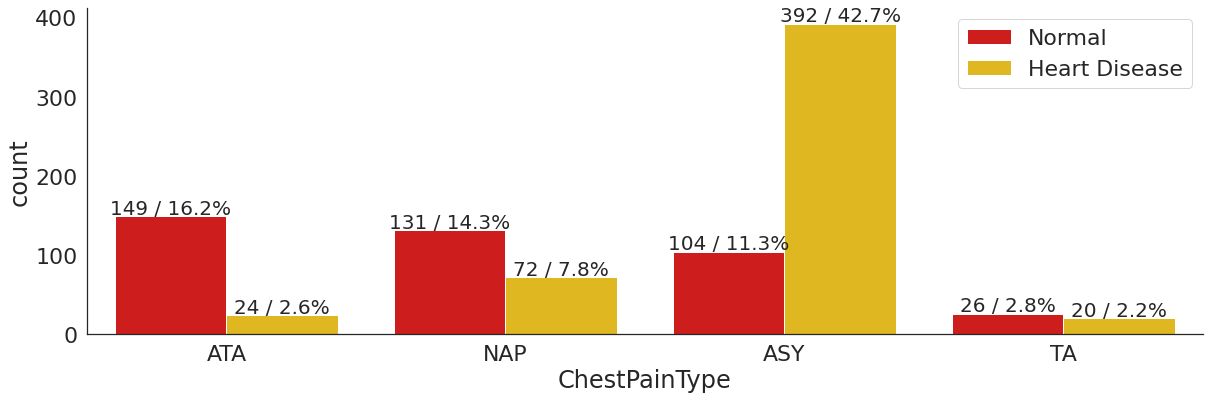

In [312]:
plt.figure(figsize=(20,6))
sns.set(font_scale = 2)
sns.set_style("white")
ax = sns.countplot(data=df, x='ChestPainType',hue='HeartDisease',palette='hot')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 10, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
plt.legend(labels=labels)
sns.despine()

Observation:Asymptomatic patients are diagnosed as having heart disease.

**Resting electrocardiographic measurement**


1.   Normal: Normal
2.   ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
3.   LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria




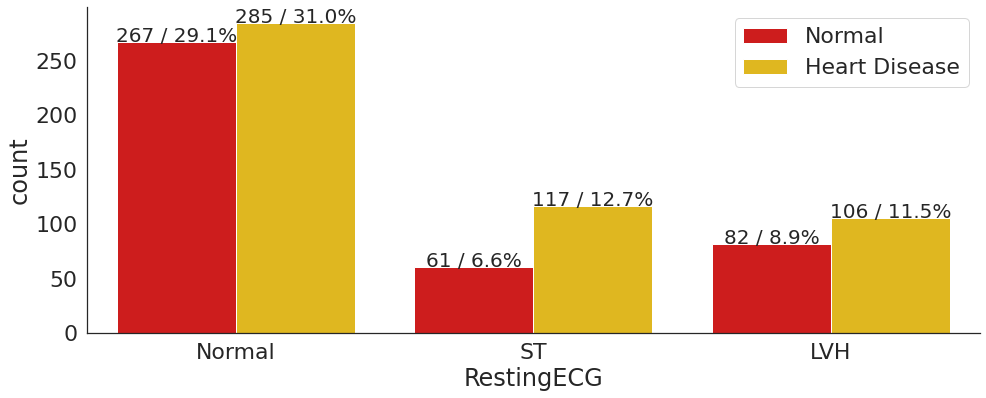

In [313]:
plt.figure(figsize=(16,6))
sns.set(font_scale = 2)
sns.set_style("white")
ax = sns.countplot(data=df, x='RestingECG',hue='HeartDisease',palette='hot')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 5, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
plt.legend(labels=labels)
sns.despine()

**Exercise induced angina**


1.   Y:yes
2.   N:No



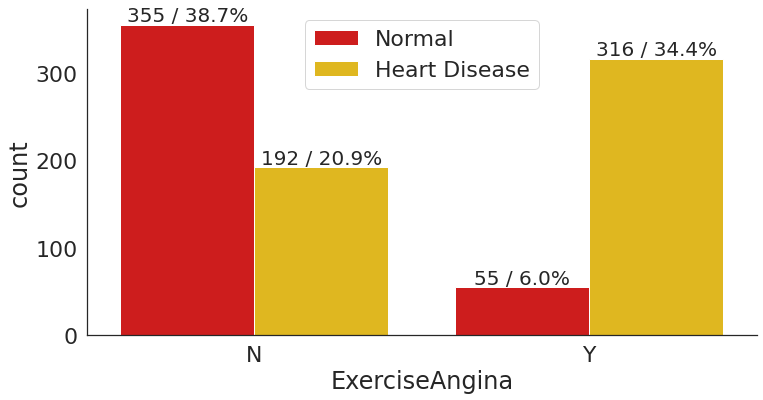

In [314]:
plt.figure(figsize=(12,6))
sns.set(font_scale = 2)
sns.set_style("white")
ax = sns.countplot(data=df, x='ExerciseAngina',hue='HeartDisease',palette='hot')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 10, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
plt.legend(labels=labels)
sns.despine()


Observation: Heart disease is often diagnosed when exercise-induced angina is present

**ST_Slope**


*   Up: upsloping
*   Flat: flat
*   Down: downsloping





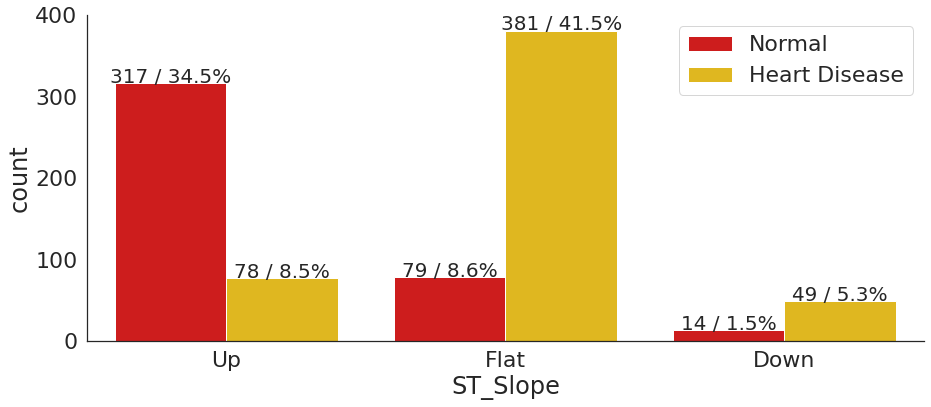

In [315]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 2)
plt.subplots_adjust(wspace=0.3)
sns.set_style("white")
ax = sns.countplot(data=df, x='ST_Slope',hue='HeartDisease',palette='hot')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 7, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
plt.legend(labels=labels)
sns.despine()

Observation: If ST_slope is up : Normal

> flat or down : Heart disease



**FastingBS**


> fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]



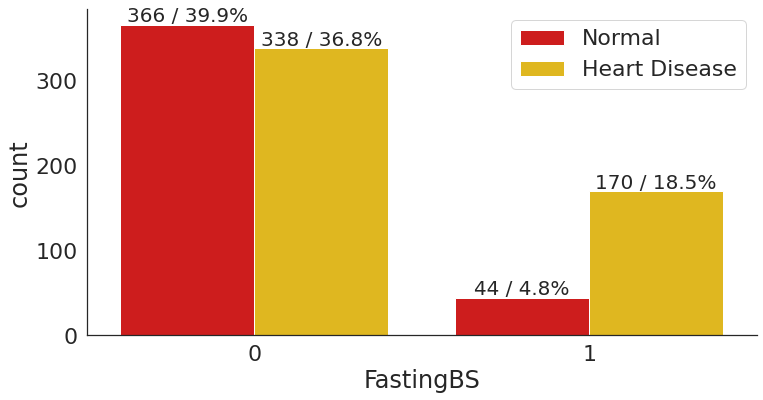

In [316]:
plt.figure(figsize=(12,6))
sns.set(font_scale = 2)
sns.set_style("white")
ax = sns.countplot(data=df, x='FastingBS',hue='HeartDisease',palette='hot')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 10, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
plt.legend(labels=labels)
sns.despine()

### Warning Run only once

In [317]:
# Convert to binary base
df['Sex'] = (df['Sex'] == 'M').astype(int)
df['ExerciseAngina'] = (df['ExerciseAngina'] == 'Y').astype(int)

# Remove upnormal data
df=df.loc[df["Cholesterol"] >0 ]
df=df.loc[df["RestingBP"] >70 ]

In [318]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0


In [319]:
df.describe()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,0.756032,133.022788,244.635389,0.167560,140.226542,0.384718,0.901609,0.477212
std,9.505888,0.429762,17.282750,59.153524,0.373726,24.524107,0.486855,1.072861,0.499816
min,28.000000,0.000000,92.000000,85.000000,0.000000,69.000000,0.000000,-0.100000,0.000000
25%,46.000000,1.000000,120.000000,207.250000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,130.000000,237.000000,0.000000,140.000000,0.000000,0.500000,0.000000
75%,59.000000,1.000000,140.000000,275.000000,0.000000,160.000000,1.000000,1.500000,1.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


## Next step is to deal with Categorical  data By using One-Hot Encoder
[One hot encoder](https://github.com/solegalli/feature-engineering-for-machine-learning/blob/main/Section-06-Categorical-Encoding/06.01-One-hot-encoding.ipynb)


In [320]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [321]:
df=pd.get_dummies(data=df, columns=["ChestPainType", "RestingECG","ST_Slope"])



In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746 entries, 0 to 917
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                746 non-null    int64  
 1   Sex                746 non-null    int64  
 2   RestingBP          746 non-null    int64  
 3   Cholesterol        746 non-null    int64  
 4   FastingBS          746 non-null    int64  
 5   MaxHR              746 non-null    int64  
 6   ExerciseAngina     746 non-null    int64  
 7   Oldpeak            746 non-null    float64
 8   HeartDisease       746 non-null    int64  
 9   ChestPainType_ASY  746 non-null    uint8  
 10  ChestPainType_ATA  746 non-null    uint8  
 11  ChestPainType_NAP  746 non-null    uint8  
 12  ChestPainType_TA   746 non-null    uint8  
 13  RestingECG_LVH     746 non-null    uint8  
 14  RestingECG_Normal  746 non-null    uint8  
 15  RestingECG_ST      746 non-null    uint8  
 16  ST_Slope_Down      746 non

### As we can see , There is no need to drop features due to correlation

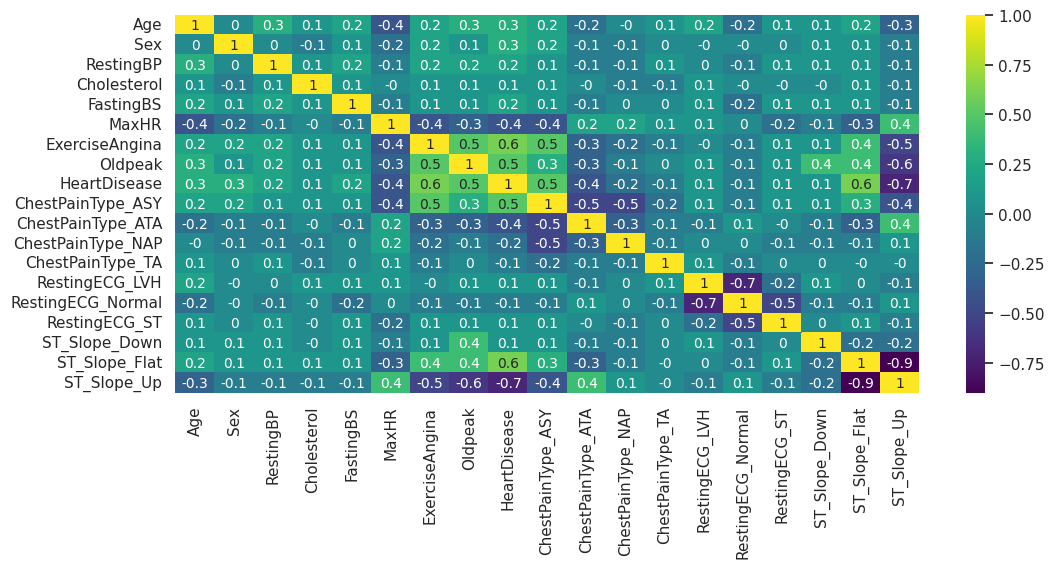

In [323]:
plt.figure(figsize = (12, 5), dpi = 100)
sns.set(font_scale = 1)
sns.heatmap(round(df.corr(), 1), annot = True, cmap = "viridis", annot_kws={"fontsize":10})
plt.show()

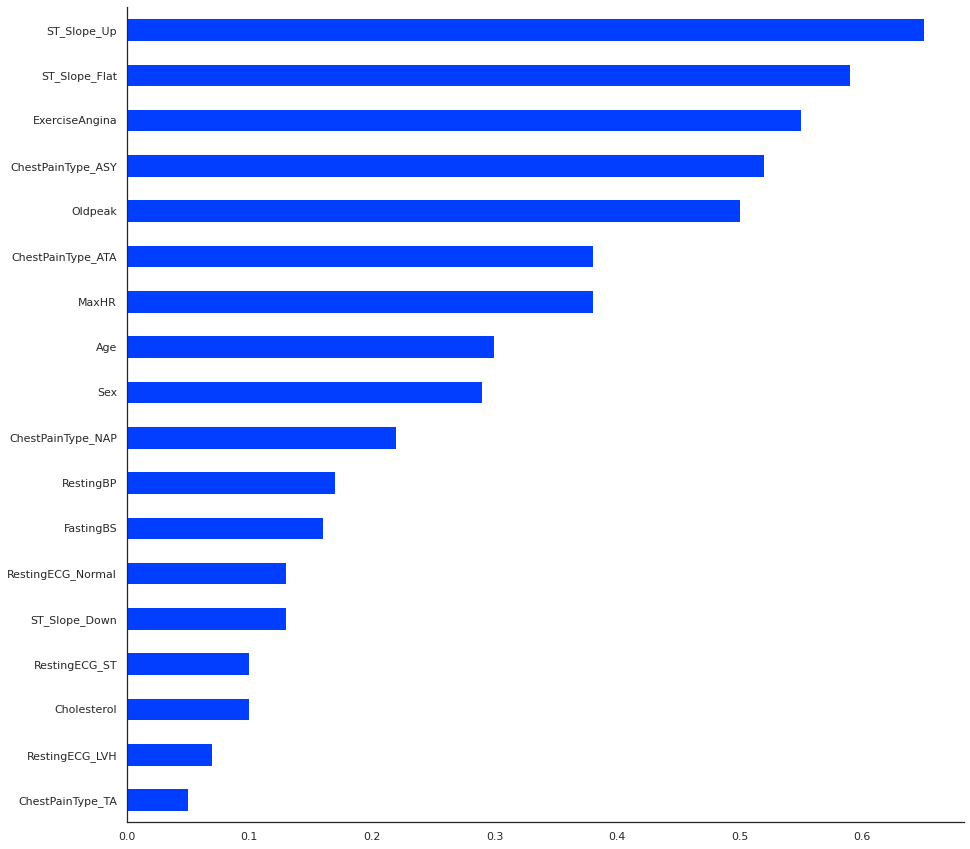

In [324]:
corr=df.corr().round(2)
plt.figure(figsize=(15, 15))
sns.set_style("white")
sns.set_palette("bright")
abs(corr['HeartDisease']).sort_values()[:-1].plot.barh()
plt.gca().set_facecolor('#FFFFFF')
sns.despine()

In [325]:
df2= df.drop([], axis = 1)

In [326]:
y=df2["HeartDisease"]
X=df2.drop(["HeartDisease"],axis=1)

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
**INFO: featurewiz can now read feather formatted files. Loading train data...
    Shape of your Data Set loaded: (746, 19)
    Loaded train data. Shape = (746, 19)
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data se

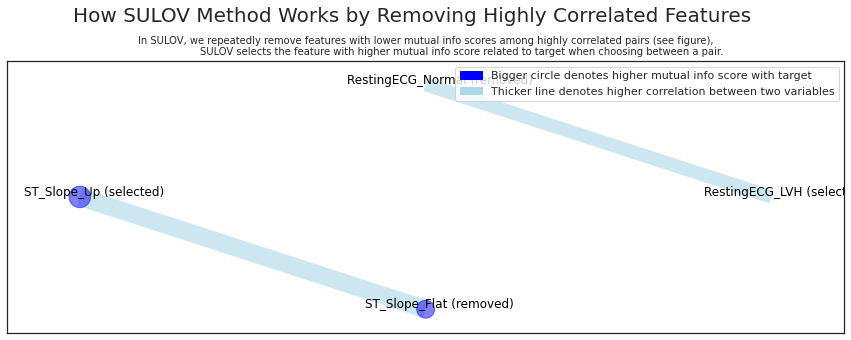

Time taken for SULOV method = 0 seconds
    Adding 0 categorical variables to reduced numeric variables  of 16
Final list of selected vars after SULOV = 16
Readying dataset for Recursive XGBoost by converting all features to numeric...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Train and Test loaded into Dask dataframes successfully after feature_engg completed
Current number of predictors = 16 
    XGBoost version: 1.6.1
Number of booster rounds = 100
        using 16 variables...
            Time taken for regular XGBoost feature selection = 0 seconds
        using 13 variables...
            Time taken for regular XGBoost feature selection = 1 seconds
        using 10 variables...
            Time taken for regular XGBoost feature selection

2

In [327]:
target = 'HeartDisease'
feats = featurewiz(df2, target, corr_limit=0.6, verbose=0)
len(feats)

In [328]:
X2=X[feats[0]]
X2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746 entries, 0 to 917
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ST_Slope_Up        746 non-null    uint8  
 1   ChestPainType_ASY  746 non-null    uint8  
 2   ExerciseAngina     746 non-null    int64  
 3   Sex                746 non-null    int64  
 4   RestingECG_ST      746 non-null    uint8  
 5   ChestPainType_TA   746 non-null    uint8  
 6   FastingBS          746 non-null    int64  
 7   RestingECG_LVH     746 non-null    uint8  
 8   ST_Slope_Down      746 non-null    uint8  
 9   Oldpeak            746 non-null    float64
 10  ChestPainType_ATA  746 non-null    uint8  
 11  ChestPainType_NAP  746 non-null    uint8  
dtypes: float64(1), int64(3), uint8(8)
memory usage: 35.0 KB


In [329]:
X_train, X_test, y_train, y_test = train_test_split( X2, y, test_size=0.33, random_state=0)

In [330]:
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors,tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

logreg_model = LogisticRegression(max_iter = 2000,C=10,random_state=0)
knn_model = neighbors.KNeighborsClassifier(n_neighbors=10)
dt_model = tree.DecisionTreeClassifier(random_state=0)
randomforest_model = RandomForestClassifier(random_state=0)
svm_model=SVC(C=1,kernel="linear",random_state=0)



In [331]:
models_names=["LogisticRegression","KNN","DecisionTreeClassifier","RandomForestClassifier","SVC"]
models=[logreg_model,knn_model,dt_model,randomforest_model,svm_model]

In [332]:
train_scores=[]
test_scores=[]

for model in models:
  model.fit(X_train, y_train)
  train_score=model.score(X_train,y_train)
  test_score=model.score(X_test,y_test)
  train_scores.append(np.round(train_score,3)*100)
  test_scores.append(np.round(test_score,3)*100)
  

In [333]:
import pandas as pd
table=pd.DataFrame({"Model":models_names,"Train score":train_scores,"Test score":test_scores})

In [334]:
table=table.sort_values(by=['Test score'],ascending=False)

In [335]:
table

,Model,Train score,Test score
0,LogisticRegression,85.8,87.4
1,KNN,87.0,87.0
4,SVC,87.2,87.0
3,RandomForestClassifier,95.2,85.4
2,DecisionTreeClassifier,95.2,81.8


Text(0.5, 0, 'Test score')

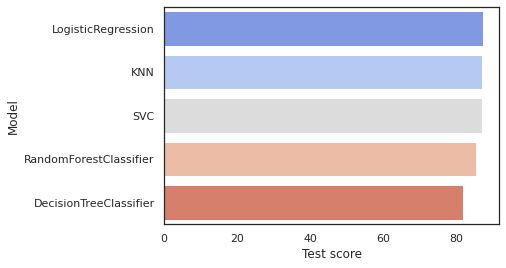

In [336]:
ax = sns.barplot(x='Test score', y='Model', data=table ,palette='coolwarm')
ax.set_xlabel('Test score')

Text(0.5, 0, 'Train score')

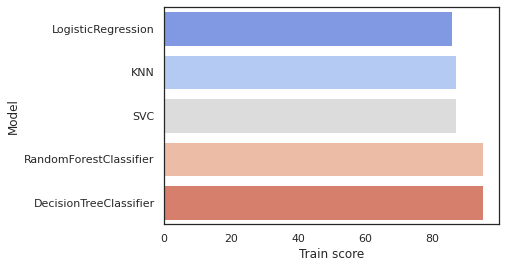

In [337]:
ax = sns.barplot(x='Train score', y='Model', data=table ,palette='coolwarm')
ax.set_xlabel('Train score')

### We take the best 3 models and tune their hyperparamters :
 - SVC
 - LogisticRegression
 - KNN

In [338]:
#### LogisticRegression
tuned=[]
# defining parameter range
param_grid = [    
    {'C' : [0.1,1,10,100,1000],
    'max_iter' : [100, 1000,2500, 5000]
    }]
grid = GridSearchCV(LogisticRegression(), param_grid)

grid.fit(X_train, y_train)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
tuned_logreg=np.round(grid.score(X_test,y_test),3)*100
tuned.append(tuned_logreg)

LogisticRegression(C=10)


In [339]:
#### KNN

# defining parameter range
param_grid = [    
    {'n_neighbors' :[1,3,5,10,20,50,100]}]
grid = GridSearchCV(neighbors.KNeighborsClassifier(), param_grid)
grid.fit(X_train, y_train)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
tuned_knn=np.round(grid.score(X_test,y_test),3)*100
tuned.append(tuned_knn)

KNeighborsClassifier(n_neighbors=10)


In [340]:
### SVC


from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = [    
    {'C' : [0.1,1,10,100,1000],
    'kernel' : ["linear", "poly", "rbf"]
    }]
grid = GridSearchCV(SVC(), param_grid)
grid.fit(X_train, y_train)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
tuned_svc=np.round(grid.score(X_test,y_test),3)*100
tuned.append(tuned_svc)

SVC(C=1)


In [341]:
names=["LogisticRegression","KNN","SVC"]
table2=table[table['Model'].isin(names)] 

In [342]:
table2["Test Score after Hyperparameter Tuning"]=tuned

In [343]:
table2

,Model,Train score,Test score,Test Score after Hyperparameter Tuning
0,LogisticRegression,85.8,87.4,87.4
1,KNN,87.0,87.0,87.0
4,SVC,87.2,87.0,88.3


Text(0.5, 0, 'Test score')

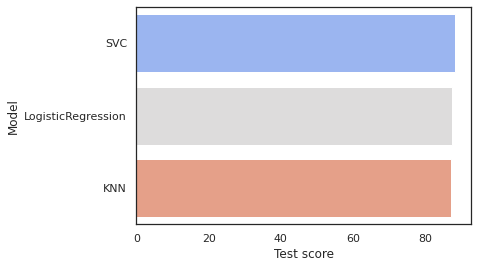

In [344]:
ax = sns.barplot(x='Test Score after Hyperparameter Tuning', y='Model', data=table2.sort_values(by=['Test Score after Hyperparameter Tuning'],ascending=False) ,palette='coolwarm')
ax.set_xlabel('Test score')